In [ ]:
%pip install comet_ml --quiet
%pip install sweetviz --quiet

     |████████████████████████████████| 15.1 MB 189 kB/s 


In this notebook, we'll use `sweetviz` to do some data profiling and get an understanding of what's in our dataset. We'll then log the results of this to Comet, that way its easily accessible to our teammates and colleagues who may want to examine the results on their own.

If you missed the first notebook in this seres, you can check it out here [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pZwUQpx0yJiCDKVsU6ZTyZHPStQ8rVG3?usp=sharing)

# Import required libraries

In [ ]:
import pandas as pd
import sweetviz
import comet_ml
from comet_ml import Experiment, Artifact

# Download artifact from Comet Experiment

We provide the `logged_artifact.download()` method the parameter `path = './'` to indicate that the file should be dowloaded to the same directory as this notebook.

In [ ]:
comet_ml.init()
experiment = Experiment(workspace='team-comet-ml', project_name='fraud-detection-demo')
experiment.add_tag("sweetviz")
experiment.set_name('fetching-data-for-profiling')
logged_artifact = experiment.get_artifact("paysim-data")
logged_artifact.download(path = './')
experiment.end()


Please enter your Comet API key from https://www.comet.ml/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Comet API key is valid
COMET INFO: Comet API key saved in /root/.comet.config
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' and lookings in parents. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/team-comet-ml/fraud-detection-demo/5bcce7aad94e48019b665b68d5ebc52e

COMET INFO: Artifact 'team-comet-ml/paysim-data:1.0.0' download has been started asynchronously
COMET INFO: Still downloading 1 file(s), remaining 171.93 MB/171.93 MB
COMET INFO: Artifact 'team-comet-ml/paysim-data:1.0.0' has been successfully downloaded
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     disp

## How cool is that?

With just a few lines of code we were able to access our data.

Think of how easy this would make collaboration. 

Assuming your teammates are all using Comet and you're working out of the same workspace, all you have to do is send the experiment link to your colleagues and they could download the data artifact from the project.

Single. Source. Of. Truth.

How would you have done this before? 

You can't upload a dataset of this size to GitHub (uploading data there isn't a great practice anyway). If you had to retreive this from an s3 bucket it would have involved the same number of lines, but you wouldn't have had the same level of convenience and data lineage that Comet provides.

Let's go ahead and inspect the first few rows of our raw data.

In [ ]:
raw_data = pd.read_parquet('paysim-data.parquet.gzip')
raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Let's use a library called `sweetviz` which takes a pandas DataFrame and creates a self-contained HTML report which provides insightful and beautiful visualizations in just a two lines of code.

`sweetviz` [integrates nicely with Comet](https://towardsdatascience.com/automatically-track-all-your-eda-using-sweetviz-and-comet-ml-9cb7545b0fab) and we can log the report to an experiment to share with our teammates.


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/team-comet-ml/fraud-detection-demo/c45cff4a227444c9acce72836aa5f447
COMET INFO:   Others:
COMET INFO:     Name : profiling-data
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' and lookings in parents. You can override where Comet is looking for a Git Patch by setting the 

                                             |          | [  0%]   00:00 -> (? left)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/team-comet-ml/fraud-detection-demo/393c65aefc4c493b8092bc8fc9590db0
COMET INFO:   Others:
COMET INFO:     Name : profiling-data
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     html                : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET INFO: Uploading 1 metrics, params and output messages
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: Still uploading 2 file(s), remaining 4.93 KB/4.93 KB



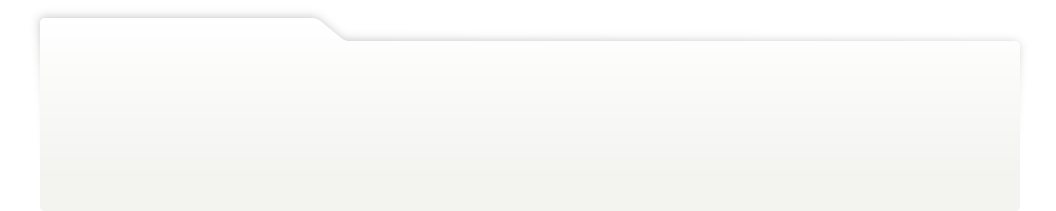
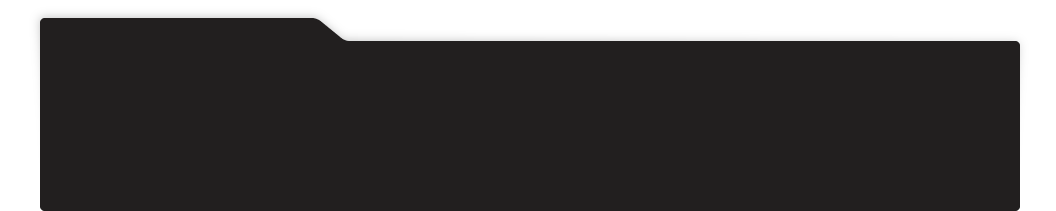
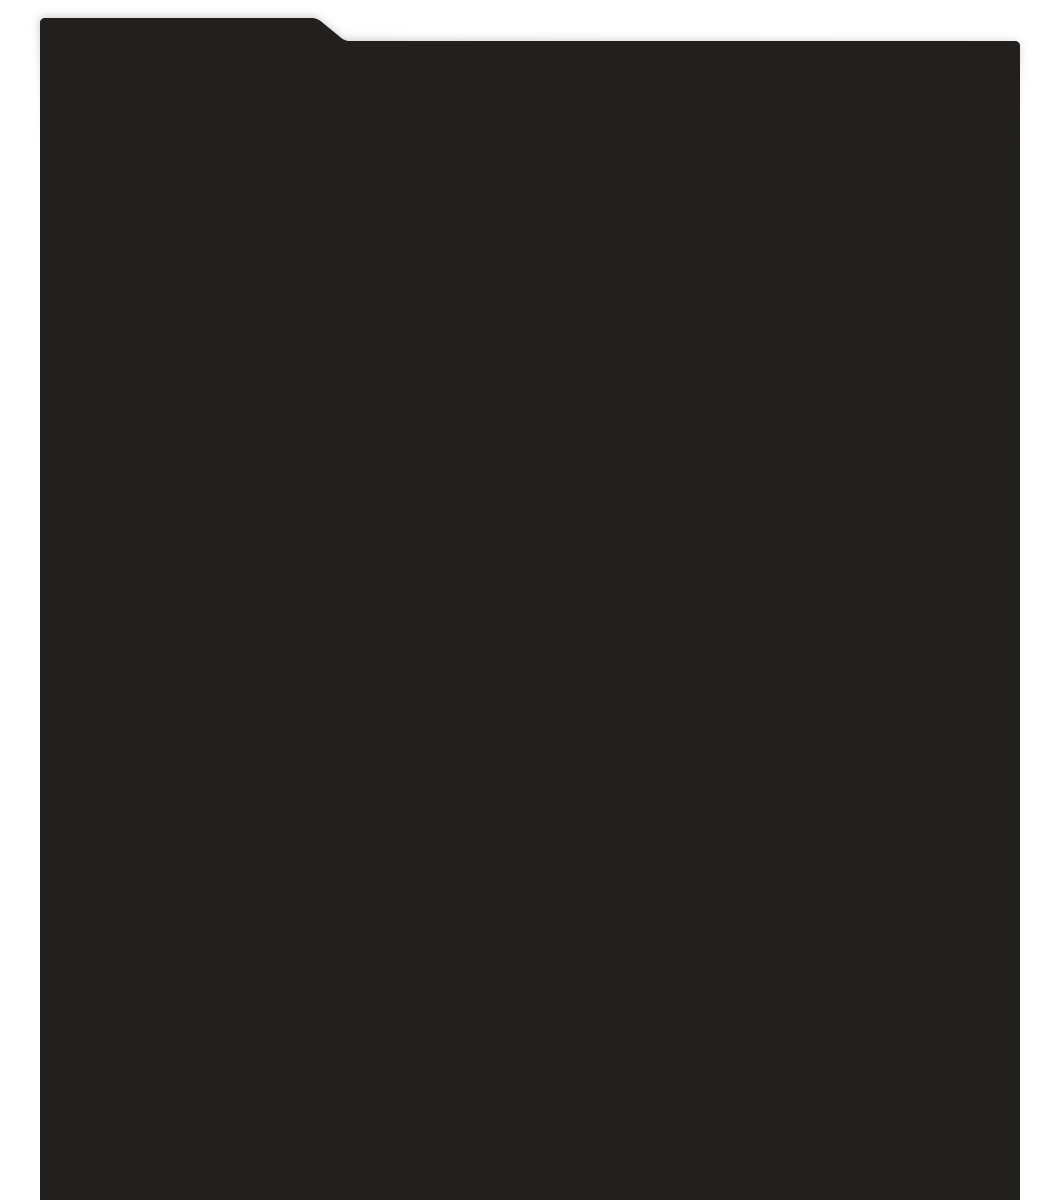
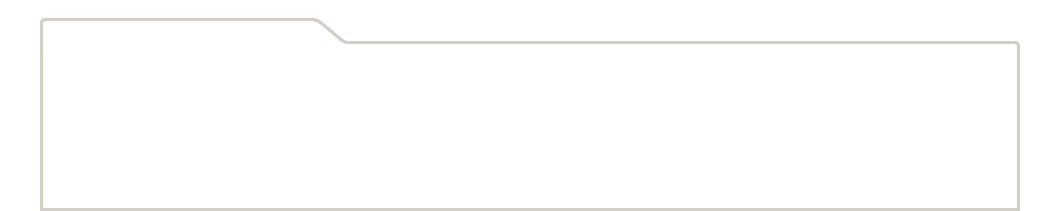
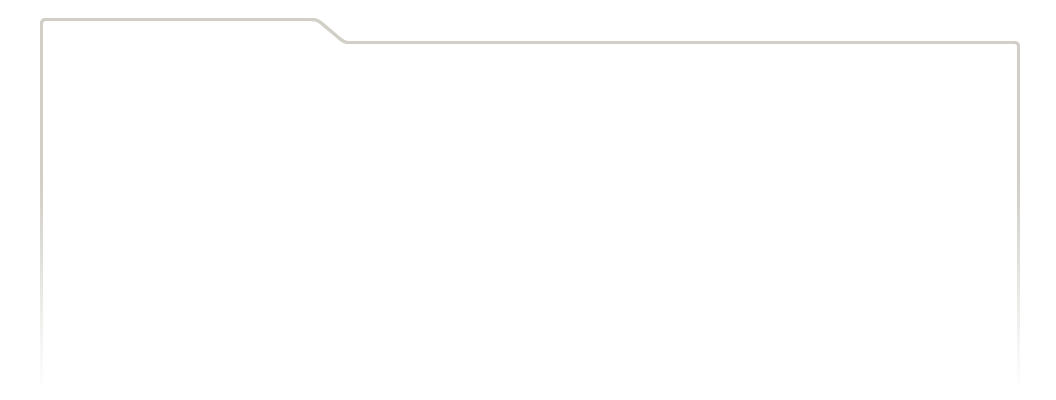
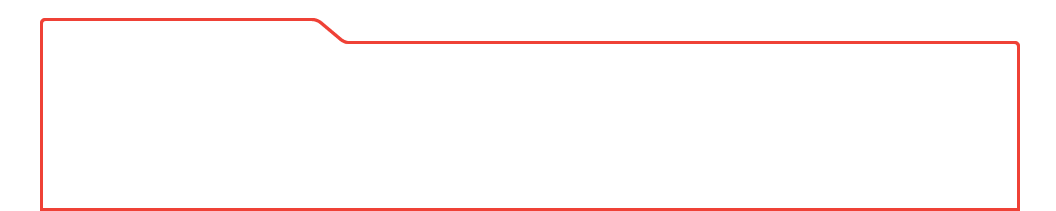
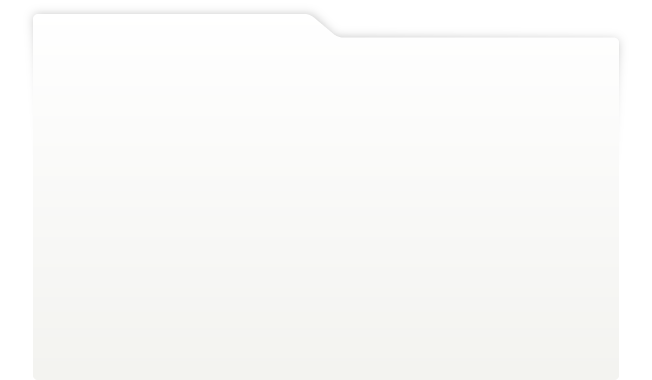
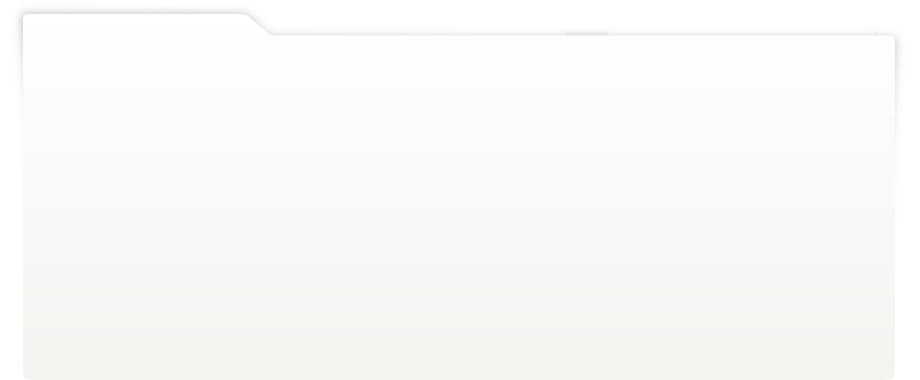
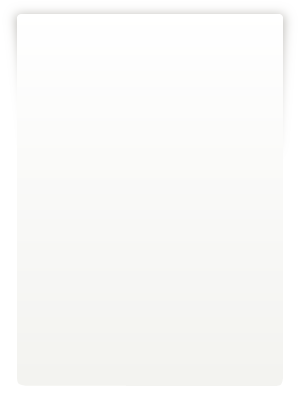
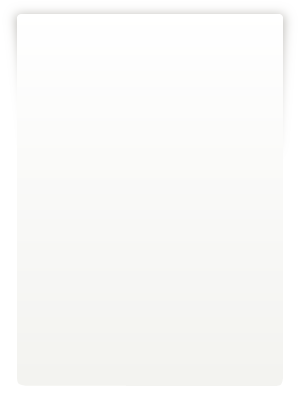
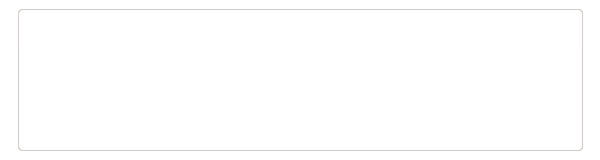
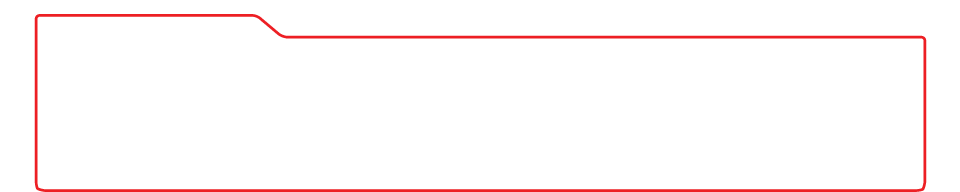
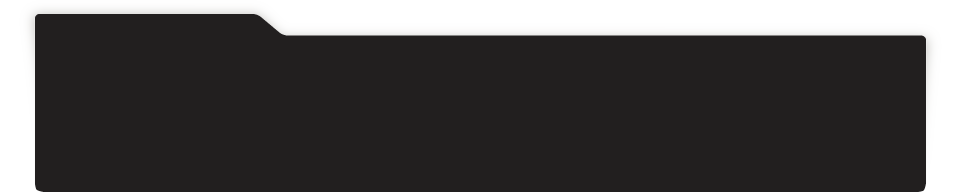
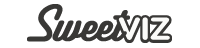
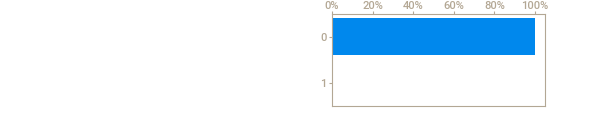
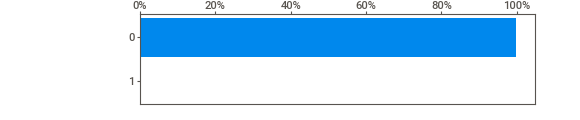
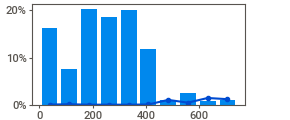
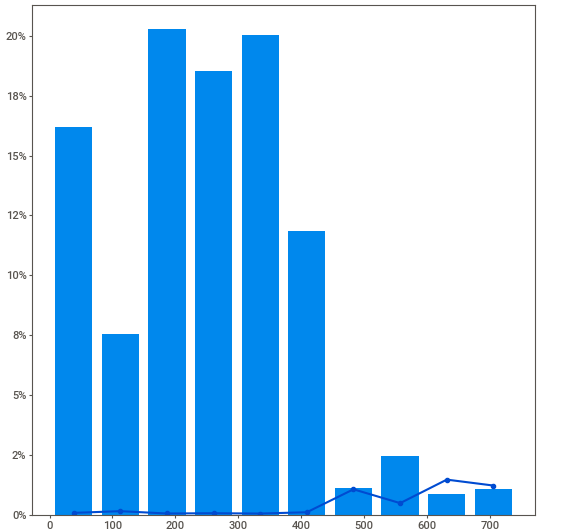
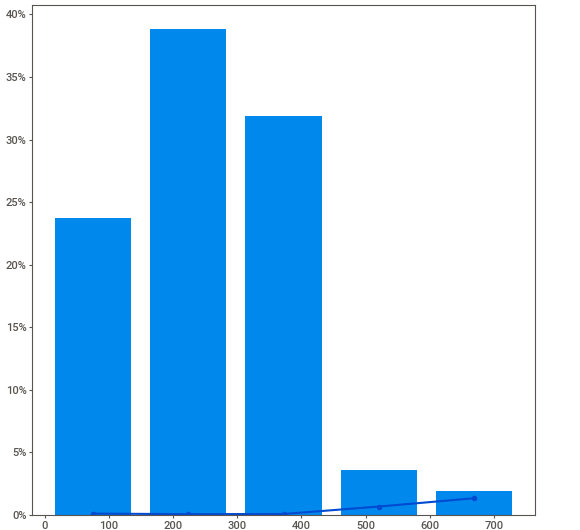
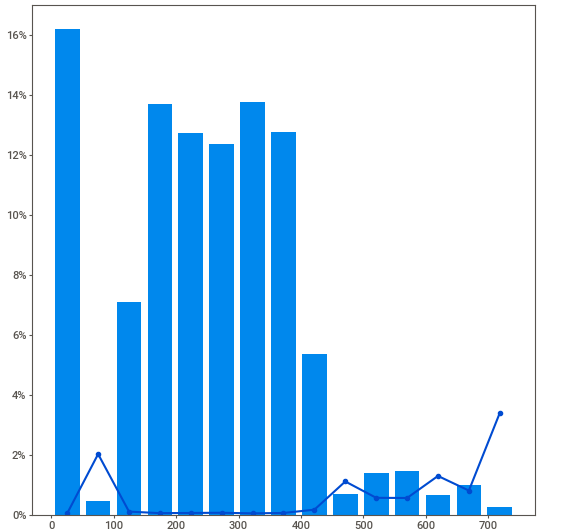
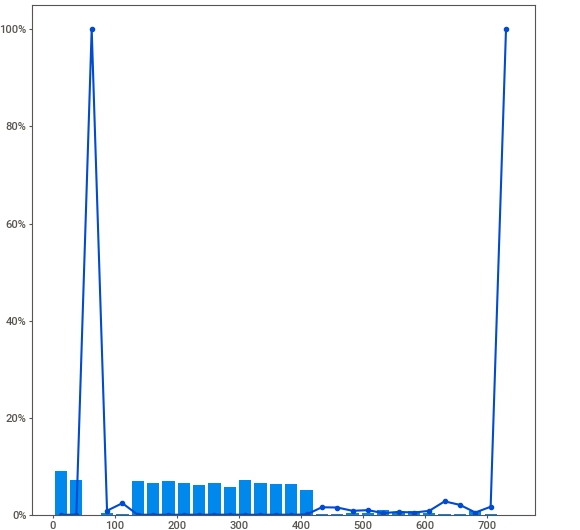
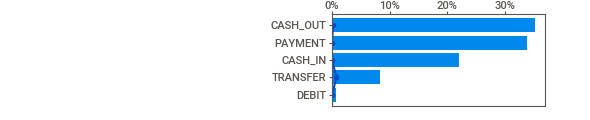
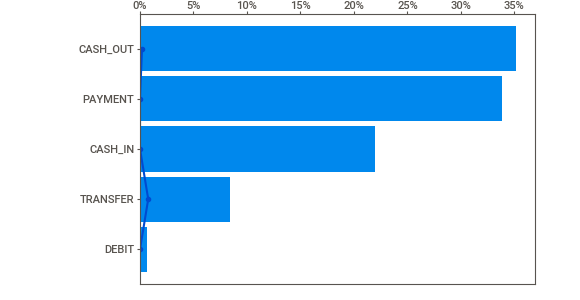
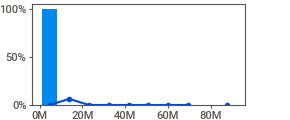
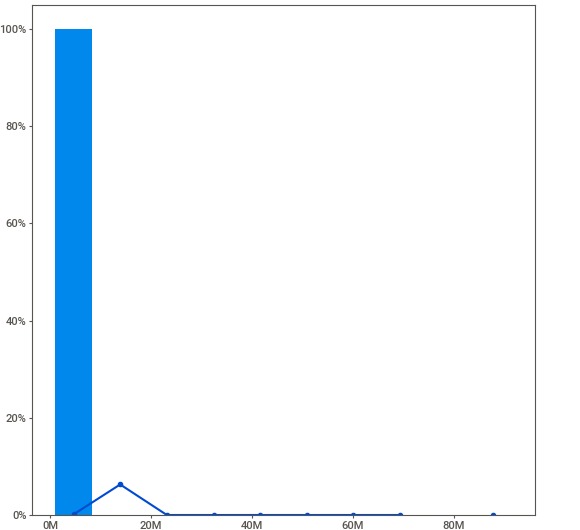
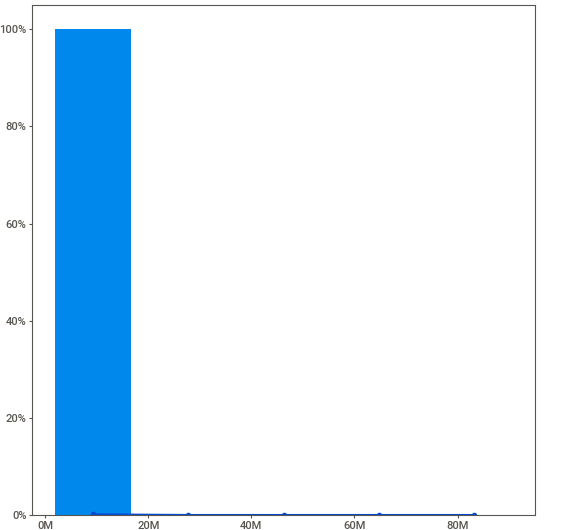
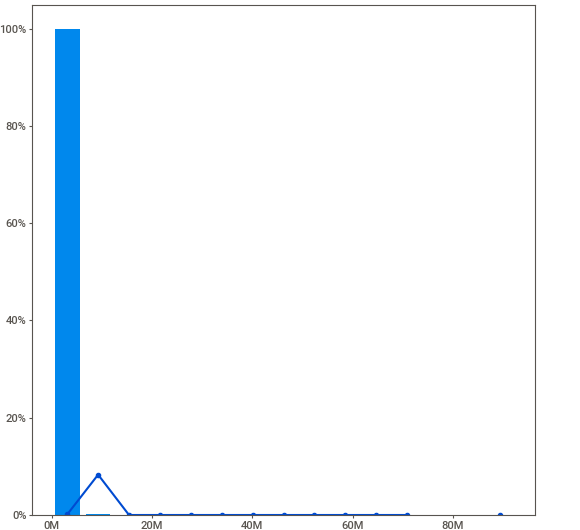
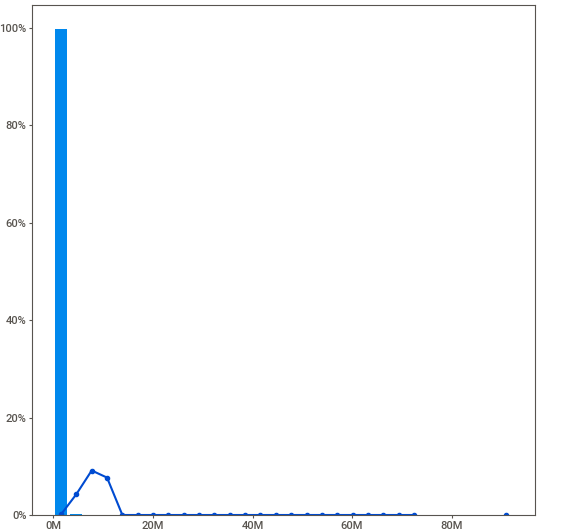
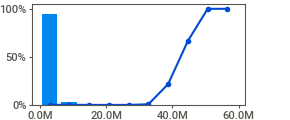
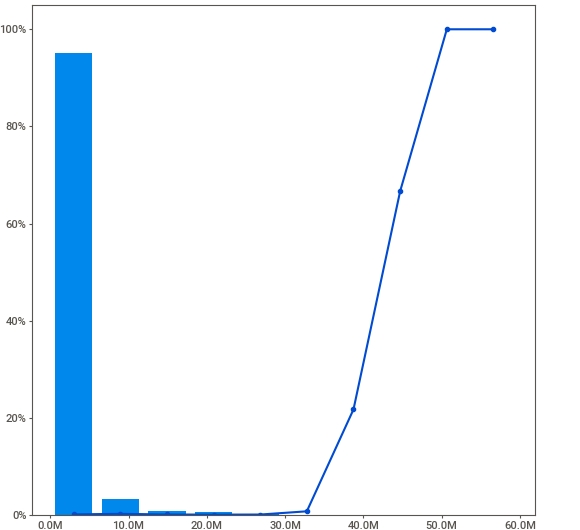
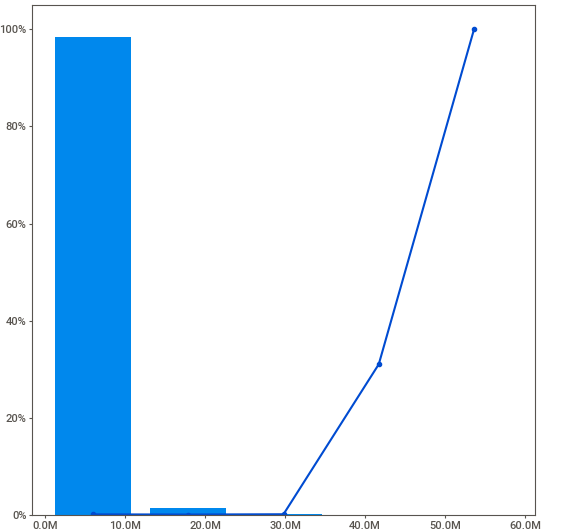
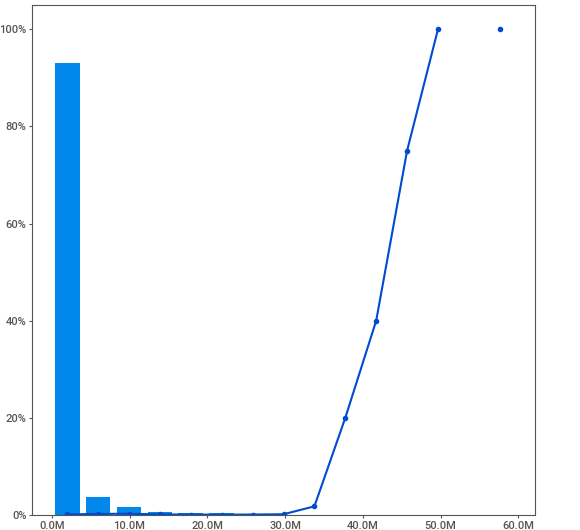
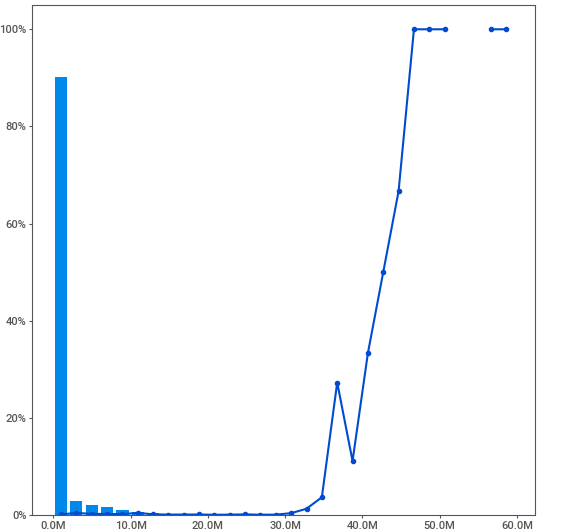
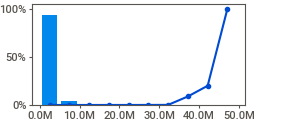
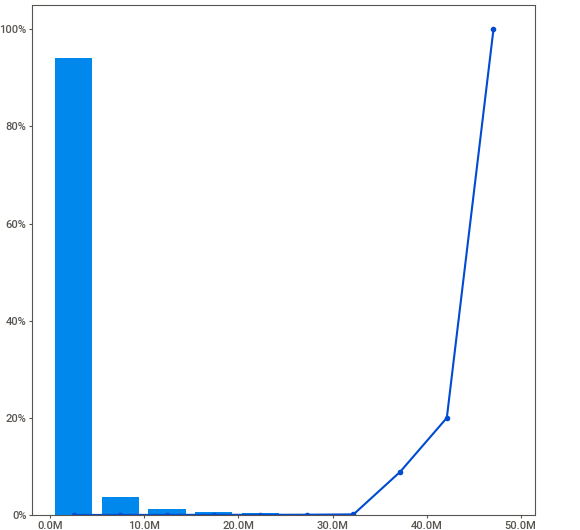
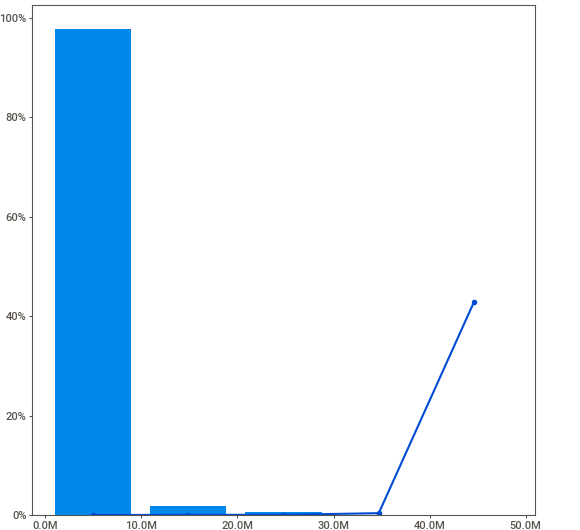
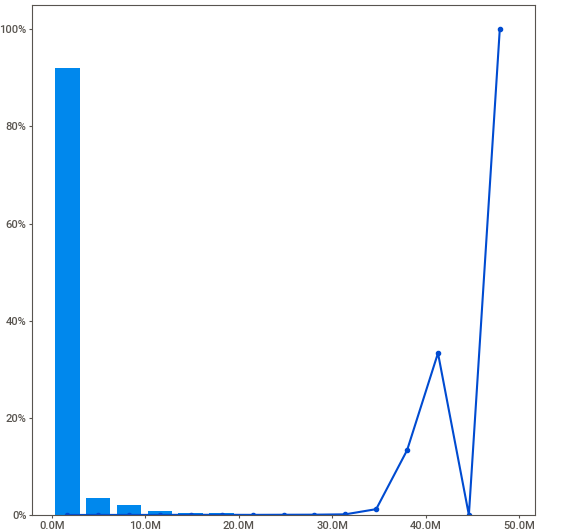
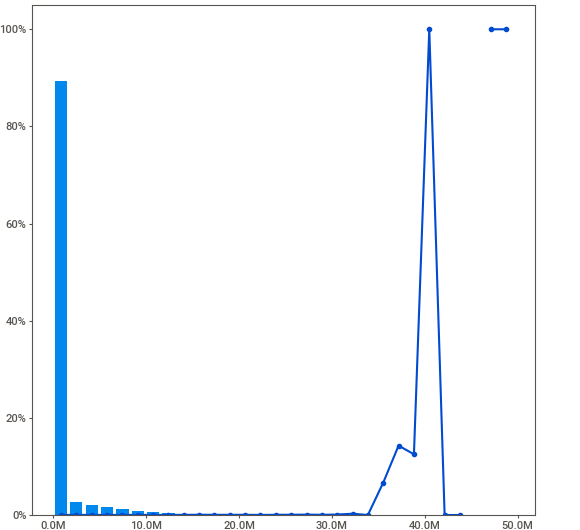
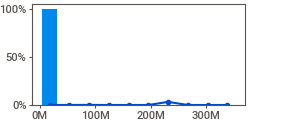
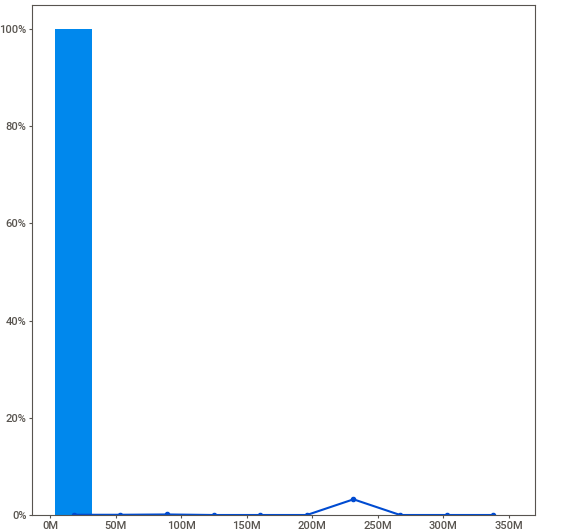
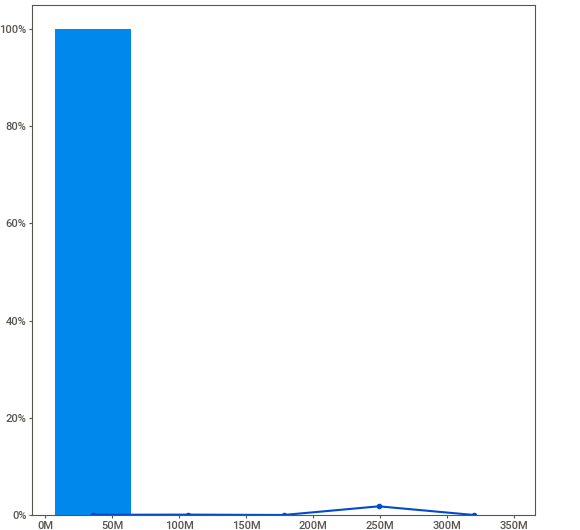
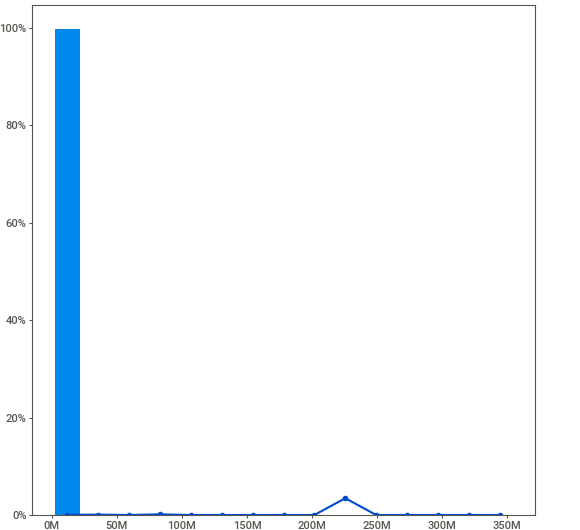
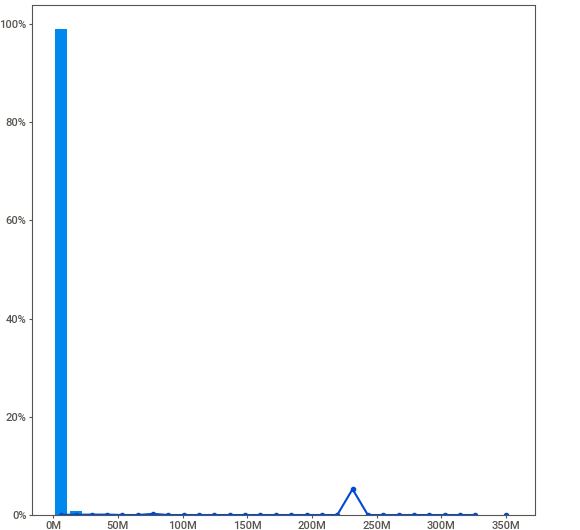
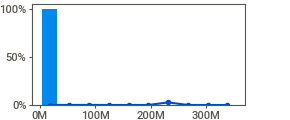
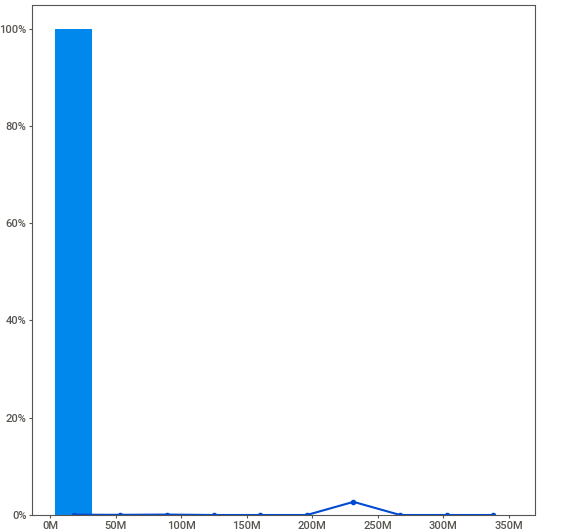
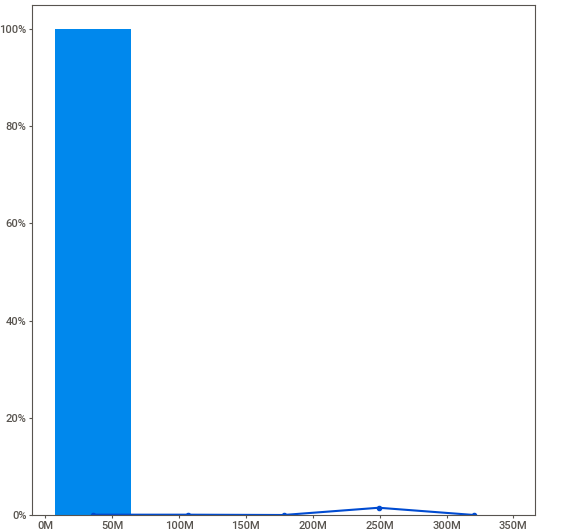
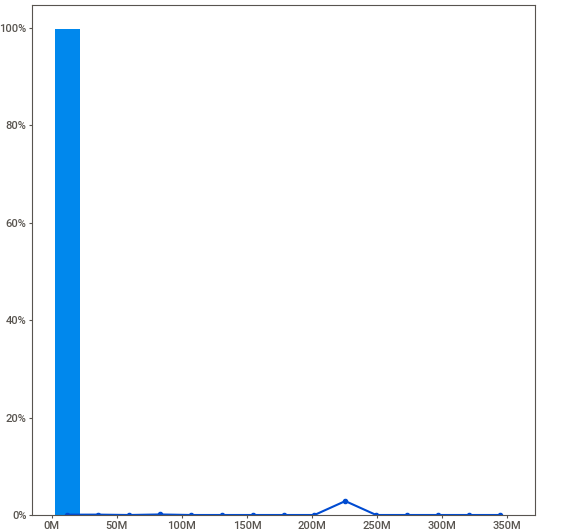
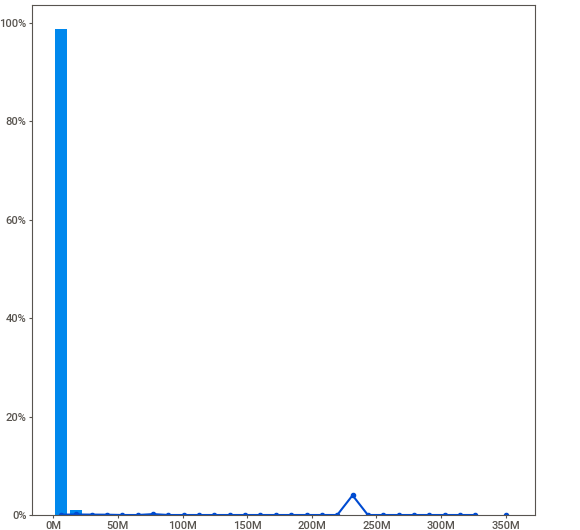
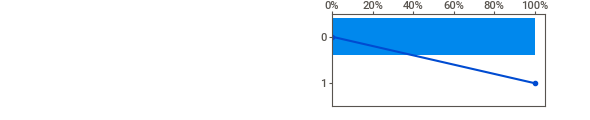
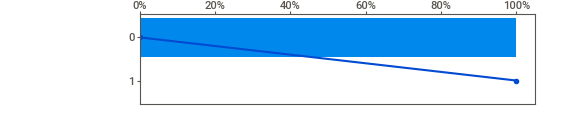
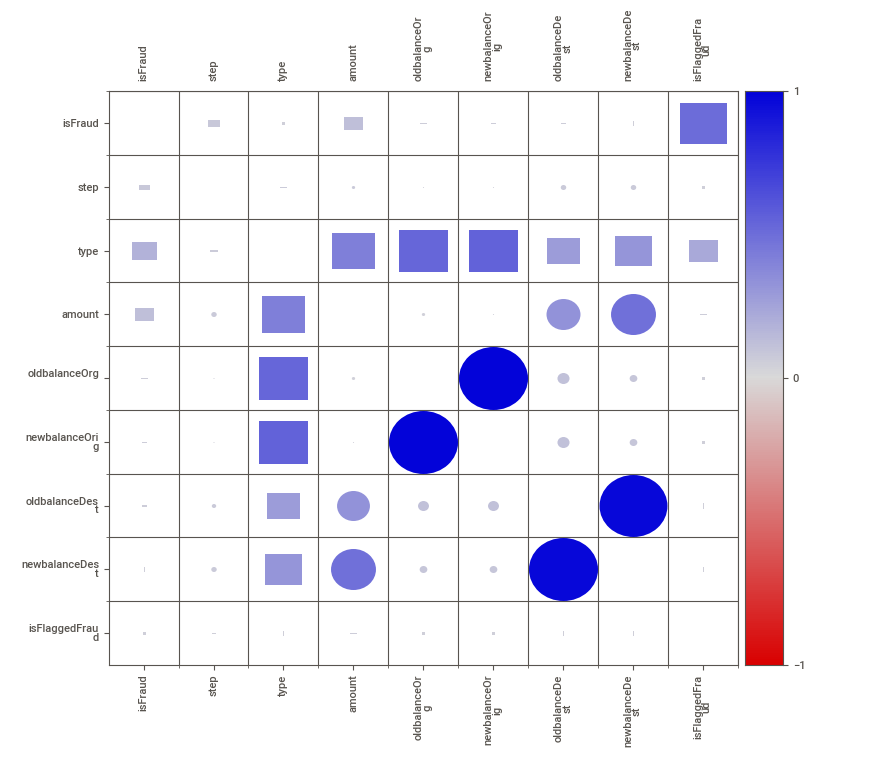
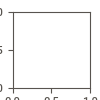

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' and lookings in parents. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/datascienceharp/general/dbdcaffc86e745a89ac0f358e0a4b975

COMET INFO: Uploading 1 metrics, params and output messages


In [ ]:
experiment = Experiment(workspace='team-comet-ml', project_name='fraud-detection-demo')
experiment.add_tag("sweetviz")
experiment.set_name('profiling-data')
report = sweetviz.analyze(raw_data, pairwise_analysis = 'on', target_feat = 'isFraud')
report.log_comet(experiment)
experiment.end()

report.show_notebook(w=900, h=500, scale=0.8)